# IQR

In [7]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'Valores': [10, 12, 14, 15, 18, 19, 20, 21, 22, 23, 50]}
df = pd.DataFrame(data)

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['Valores'].quantile(0.25)
Q3 = df['Valores'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['Valores'] < lower_bound) | (df['Valores'] > upper_bound)]
cleaned_df = df[(df['Valores'] >= lower_bound) & (df['Valores'] <= upper_bound)]

print("Outliers:\n", outliers)
print("\nData sin outliers:\n", cleaned_df)


Outliers:
     Valores
10       50

Data sin outliers:
    Valores
0       10
1       12
2       14
3       15
4       18
5       19
6       20
7       21
8       22
9       23


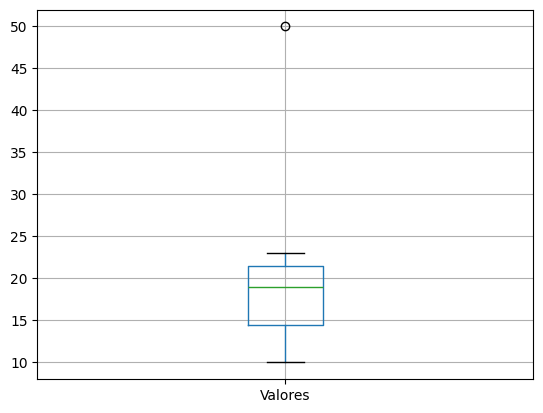

In [8]:
import matplotlib.pyplot as plt
df.boxplot(column='Valores')
plt.show()


# Distancia de Mahalanobis

Para calcular la **distancia de Mahalanobis** paso a paso, vamos a trabajar con un ejemplo sencillo usando Python. Supongamos que tenemos un conjunto de datos bidimensionales ($X$) con dos variables $x_1$ y $x_2$.

Supongamos que tenemos los siguientes datos:

| $x_1$ | $x_2$ |
|--------|--------|
| 2.5    | 3.5    |
| 3.2    | 3.8    |
| 3.0    | 4.0    |
| 2.8    | 3.6    |
| 3.4    | 4.2    |
| 2.9    | 3.7    |
| 3.1    | 3.9    |

Y queremos calcular la distancia de Mahalanobis para el punto $[3.0, 3.5]$ respecto al conjunto de datos.

## Paso 1: Calcular la media de cada variable

Calculamos el vector media $\mu$ de los datos.

$$ \mu_1 = \text{media de } x_1 = \frac{2.5 + 3.2 + 3.0 + 2.8 + 3.4 + 2.9 + 3.1}{7} = 2.9857
$$
$$ \mu_2 = \text{media de } x_2 = \frac{3.5 + 3.8 + 4.0 + 3.6 + 4.2 + 3.7 + 3.9}{7} = 3.8143
$$

El vector de medias es: $\mu = [2.9857, 3.8143]$

## Paso 2: Calcular la matriz de covarianza

La matriz de covarianza se calcula usando las variables $x_1$ y $x_2$.

$$
\Sigma = \text{cov}(X) =
\begin{bmatrix}
\text{var}(x_1) & \text{cov}(x_1, x_2) \\
\text{cov}(x_2, x_1) & \text{var}(x_2)
\end{bmatrix}
$$

In [1]:
import numpy as np

# Datos
X = np.array([[2.5, 3.5],
              [3.2, 3.8],
              [3.0, 4.0],
              [2.8, 3.6],
              [3.4, 4.2],
              [2.9, 3.7],
              [3.1, 3.9]])

# Matriz de covarianza
cov_matrix = np.cov(X, rowvar=False)
print(cov_matrix)

[[0.0847619  0.06190476]
 [0.06190476 0.05809524]]


## Paso 3: Calcular la inversa de la matriz de covarianza

Calculamos la inversa de la matriz de covarianza $\Sigma^{-1}$

In [2]:
inv_cov_matrix = np.linalg.inv(cov_matrix)
print(inv_cov_matrix)

[[ 53.19767442 -56.68604651]
 [-56.68604651  77.61627907]]


## Paso 4: Restar el vector media al punto dado

Restamos el vector media $\mu = [2.9857, 3.8143]$ del punto $[3.0, 3.5]$:

$$x - \mu = [3.0, 3.5] - [2.9857, 3.8143] = [0.0143, -0.3143]$$

In [3]:
x = np.array([3.0, 3.5])
mean = np.mean(X, axis=0)
diff = x - mean

# Distancia de Mahalanobis
D_M = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
print(D_M)

2.861199362858153


Esto significa que el punto $[3.0, 3.5]$ está a una distancia de 2.86 de la media multivariada de los datos, según la distribución de los mismos.

## Interpretación:

En general, los puntos con una distancia de Mahalanobis alta se consideran **outliers**. Un umbral común para detectar outliers es usar la distribución $\chi^2$, comparando la distancia con el cuantil de esta distribución para determinar si un punto es un valor atípico